In [2]:
import pandas as pd
from wbtool import file_misc as fm
from wbtool import use_models
import numpy as np

uselabel = True

if uselabel:
    lbdata = pd.read_csv('/home/wb/samba_dir/cells_brightfield/leadingcell-WB-entirespan/Results_B1ROI1.csv')
    SA = use_models.cv.sam_agent('prompt')
else:
    SA = use_models.cv.sam_agent('auto')

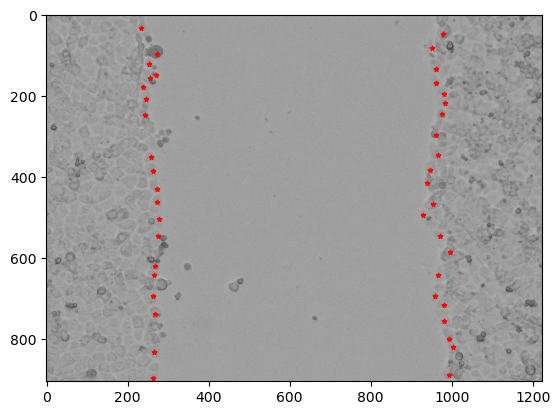

In [3]:
import matplotlib.pyplot as plt
import proc_data

frame = 0
# img = fm.imgtiff_read('/home/wb/working/celltrack/A4ROI1.tif', frame)
img = np.load('/home/wb/samba_dir/cells_brightfield/leadingcell-WB-entirespan/B1ROI1.npy')[frame]
img = proc_data.value_modify(img)

if uselabel:
    lb = lbdata[lbdata['Slice']==(frame+1)]  # use frame

    ax=plt.gca()
    ax.imshow(img)
    ax.scatter(lb['X'], lb['Y'], color='red', marker='*', s=10)
    plt.show()

In [5]:
if uselabel:
    point_prompt = lb[['X','Y']]
    point_prompt = point_prompt.to_numpy()
    # print(point_prompt)
    # print(img.shape)
    masks = SA.infer(img, point_prompt)
else:
    masks = SA.infer(img)

In [ ]:
from wbtool import show

print(len(point_prompt))
print(point_prompt)

# print(masks[10].keys())
# show.wshow(masks[100]['segmentation'])
# show.wshow(masks[18]['segmentation'])

42
9
[247060   1016 248702    105 248103 243034 242930    419 242453 241720
 243238 243126 243804 241667 243858 242357 242470    564 242563 240742
    256 237701 235538 236733 236117 235244    410    308 235116 234955
     66 232578 603290 234812    934 236250 236034 232341 233200 235569
 234704 233806]
[    66    105    256    308    410    419    564    934   1016 232341
 232578 233200 233806 234704 234812 234955 235116 235244 235538 235569
 236034 236117 236250 236733 237701 240742 241667 241720 242357 242453
 242470 242563 242930 243034 243126 243238 243804 243858 247060 248103
 248702 603290]


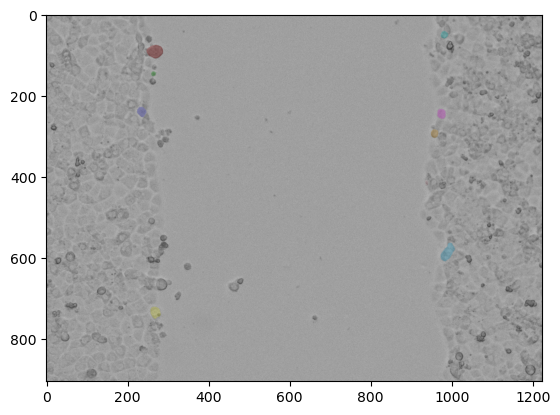

In [6]:
from wbtool import show

print(len(masks))
if uselabel:
    tp = masks
else:
    tp = [it['segmentation'] for it in masks]
    tp = tp[1:]

# filter
ma = tp.sum(1).sum(1)
imga = masks.shape[1]*masks.shape[2]
mar = ma/imga
I = mar<0.01
tp = tp[I]
print(len(tp))
print(ma)
ma.sort()
print(ma)
a = show.overlay_mask(img, tp)
show.wshow(a)
# np.save('/home/wb/working/mask_label.npy', masks)